# Pymaceuticals Inc.
---

### Analysis

This data analyis compares the performance of various anti-cancer drug treatments on reducing the volume of SCC tumors across a treatment period of 45 days. It combines the biological data of each mouse included in the anti-SCC-cancer animal study (Weight, Age, Sex), and the clinical data collected at each time point (Drug Regimen, Tumor Volume, Metastatic Sites). 

The following conclusions have been made after generating the tables and figures required for the technical report of this clinical study:

1.  There were uneven sample sizes recorded for each drug regimen tested. As seen in the barplot 'Count of Mice Tested per Drug Regimen', some drugs such as Capomulin had ~225 tests recorded, whereas others such as Propriva had ~150 tests recorded. Although we cannot determine bias off of this information alone, this poor experimental design does increase the likelihood of results and conclusions being affected by sampling bias. This can be especially true when calculating summary statistics, such as sample mean. 

2. There is reassurance to be found in the outlier data as, despite the uneven sampling mentioned above, there is only one potential outlier in the drugs involved in the deeper range analysis (iqr, boxplot). When the data is summarised per drug as we can see in the boxplot 'Tumor Volume range per Drug Regimen', the various treatment drugs are showing large differences in their value ranges. Although this does visually suggest that different drugs have different levels of efficacy, there needs to be more statistical analysis performed to confirm that these differences are statistically significant.

3. The strong positive correlation value of 0.84 suggests that there is a correlation between mouse weight and their tumor volume within the treatment group receiving Capomulin. This might be a strong causative factor causing the differences in tumor volume between drug regimen; if this correlation has been unaccounted for, the tumor volume performance of a treatment group with larger mice might incorrectly infer that the drug regimen is an unsuccessful treatment. This can also apply in reverse; a treatment group with smaller, lighter weight mice might incorrectly infer that the drug regimen used is a more successful treatment than accurate. This can be resolved by intentionally creating treatment groups of mice with statistically similar average weight values, or by analysing drug regimen success by change in tumor volume overtime rather than raw tumor volume values or average tumor volume values. 
 

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
pyma_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(pyma_df["Mouse ID"].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = pyma_df[pyma_df.duplicated(["Mouse ID", "Timepoint"])]
print(dup_mice["Mouse ID"].unique())


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id = dup_mice["Mouse ID"]
pyma_df.loc[pyma_df["Mouse ID"].isin(dup_mice_id)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pyma_df_filt = pyma_df[~pyma_df["Mouse ID"].isin(dup_mice_id)]
pyma_df_filt.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_filt = len(pyma_df_filt["Mouse ID"].unique())
num_mice_filt

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_grouping = pyma_df_filt.groupby("Drug Regimen")

#Mean
mean_drug = pd.DataFrame(drug_grouping["Tumor Volume (mm3)"].mean())
mean_drug = mean_drug.rename(columns={"Tumor Volume (mm3)": "Mean"})

#Median
median_drug = pd.DataFrame(drug_grouping["Tumor Volume (mm3)"].median())
median_drug = median_drug.rename(columns={"Tumor Volume (mm3)": "Median"})

#Variance
var_drug = pd.DataFrame(drug_grouping["Tumor Volume (mm3)"].var())
var_drug = var_drug.rename(columns={"Tumor Volume (mm3)": "Variance"})

#Standard Deviation
std_drug = pd.DataFrame(drug_grouping["Tumor Volume (mm3)"].std())
std_drug = std_drug.rename(columns={"Tumor Volume (mm3)": "Standard Dev"})

#SEM
sem_drug = pd.DataFrame(drug_grouping["Tumor Volume (mm3)"].sem())
sem_drug = sem_drug.rename(columns={"Tumor Volume (mm3)": "Std Error of Mean"})

# Assemble the resulting series into a single summary DataFrame.
summary_stats_drug = pd.concat([mean_drug, median_drug, var_drug, std_drug, sem_drug], axis=1)
summary_stats_drug

,Mean,Median,Variance,Standard Dev,Std Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
sum_stats_agg = pyma_df_filt.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
sum_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

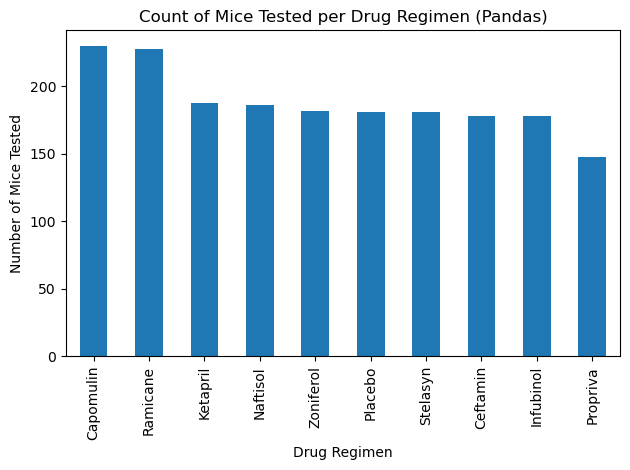

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Isolate Data
num_mice_drug_df = pd.DataFrame(pyma_df_filt.value_counts("Drug Regimen"))
num_mice_drug_df.columns = ["Num Mice"]

#Plot the data
figure_1 = num_mice_drug_df.plot(kind="bar", title="Count of Mice Tested per Drug Regimen (Pandas)", legend=False)
figure_1.set_xticklabels(num_mice_drug_df.index, rotation = 90)
figure_1.set_xlabel("Drug Regimen")
figure_1.set_ylabel("Number of Mice Tested")

#Save and Display the plot
plt.tight_layout()
plt.savefig("Count of Mice Tested per Drug Regimen (Pandas).png")
plt.show()

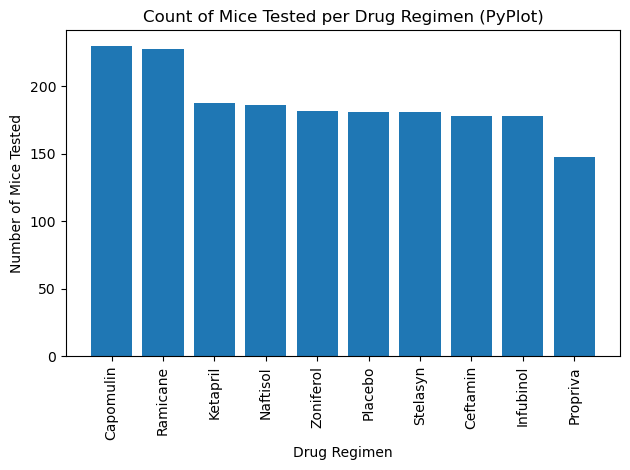

In [83]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Isolate the Data
num_mice_list = num_mice_drug_df["Num Mice"]
drug_names = num_mice_drug.index.tolist()

#Plot the data
plt.bar(drug_names, num_mice_list)
plt.xticks(drug_names, rotation=90)
plt.title("Count of Mice Tested per Drug Regimen (PyPlot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

#Save and display figure
plt.tight_layout()
plt.savefig("Count of Mice Tested per Drug Regimen (PyPlot).png")
plt.show()

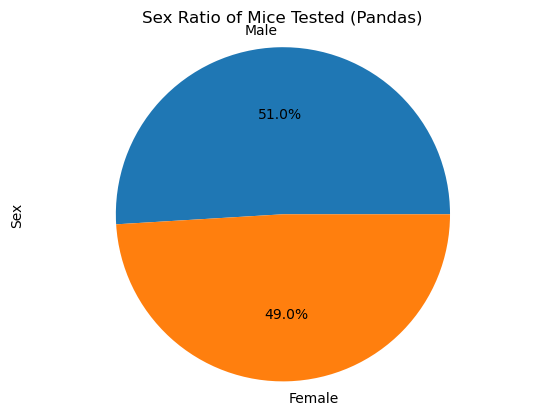

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Isolate the data
sex_mice_df = pd.DataFrame(pyma_df_filt.value_counts("Sex"))
sex_mice_df.columns = ["Sex"]

#Plot the data
figure_2 = sex_mice_df.plot(kind="pie", y="Sex", title="Sex Ratio of Mice Tested (Pandas)", autopct="%1.1f%%", legend=False)

#Save and Display the plot
plt.axis("equal")
plt.savefig("Sex Ratio of Mice Tested (Pandas).png")
plt.show()


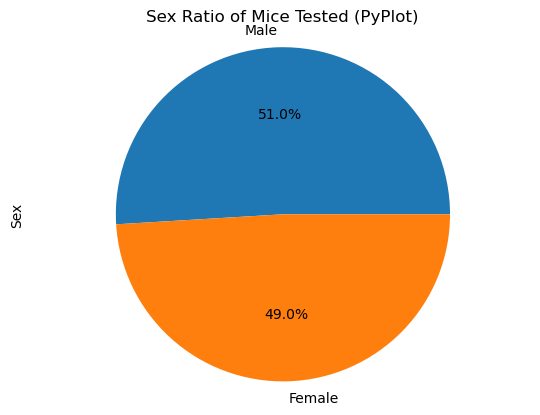

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Isolate the data
num_mice_sex = sex_mice_df["Sex"].tolist()
mice_sex = sex_mice_df.index.tolist()

# #Plot the data
plt.pie(num_mice_sex, labels=mice_sex, autopct="%1.1f%%")
plt.title("Sex Ratio of Mice Tested (PyPlot)")
plt.ylabel("Sex")

# #Save and Display the plot
plt.axis("equal")
plt.savefig("Sex Ratio of Mice Tested (PyPlot).png")
plt.show()


## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_time = pd.DataFrame(pyma_df_filt.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time = max_time.reset_index(drop=False)
max_time_df = pd.merge(pyma_df_filt, max_time, on=["Mouse ID", "Timepoint"], how="inner")
max_time_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [211]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []


# Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(len(max_time_df)):
    if max_time_df.loc[i, "Drug Regimen"] in drug_list:
        tumor_data.append(max_time_df.loc[i, ["Drug Regimen", "Tumor Volume (mm3)"]])

tumor_data_df = pd.DataFrame(tumor_data)
tumor_data_df.head()



,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472


In [213]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
filtered_tumor_data = []

for drug in drug_list:
    outlier_tumor_data = []
    subset = tumor_data_df.loc[tumor_data_df["Drug Regimen"] == drug, :]
    quartiles = np.quantile(subset["Tumor Volume (mm3)"], [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[0]
    lower_bound = quartiles[0] - (1.5 * iqr)
    upper_bound = quartiles[2] + (1.5 * iqr)
    subset_df = pd.DataFrame(subset).reset_index()

    # Determine outliers using upper and lower bounds
    for j in range(len(subset_df)):
        if (subset_df.loc[j, "Tumor Volume (mm3)"] >= lower_bound) & (subset_df.loc[j, "Tumor Volume (mm3)"] <= upper_bound):
            filtered_tumor_data.append(subset_df.loc[j, :])
        else:
            outlier_tumor_data.append(subset_df.loc[j, :])
    
    #Dataframe transformations
    filtered_tumor_data_df = pd.DataFrame(filtered_tumor_data)
    outlier_tumor_data_df = pd.DataFrame(outlier_tumor_data)

    #Print the IQR and outlier data
    print(f'The IQR for the drug {drug} is {round(iqr, 2)} with an upper bound of {round(upper_bound, 2)} and a lower bound of {round(lower_bound, 2)}.')
    if len(outlier_tumor_data_df) == 0:
        print(f'There are no outlier tumor volumes for this drug.')
        print("------------------------------------")
    else:
        print(f'The outliers tumor volumes for this drug are:')
        for k in range(len(outlier_tumor_data_df)):
            print(outlier_tumor_data_df["Tumor Volume (mm3)"])
        print("------------------------------------")


The IQR for the drug Capomulin is 7.78 with an upper bound of 51.83 and a lower bound of 20.7.
There are no outlier tumor volumes for this drug.
------------------------------------
The IQR for the drug Ramicane is 9.1 with an upper bound of 54.31 and a lower bound of 17.91.
There are no outlier tumor volumes for this drug.
------------------------------------
The IQR for the drug Infubinol is 11.48 with an upper bound of 82.74 and a lower bound of 36.83.
The outliers tumor volumes for this drug are:
5    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------
The IQR for the drug Ceftamin is 15.58 with an upper bound of 87.67 and a lower bound of 25.36.
There are no outlier tumor volumes for this drug.
------------------------------------


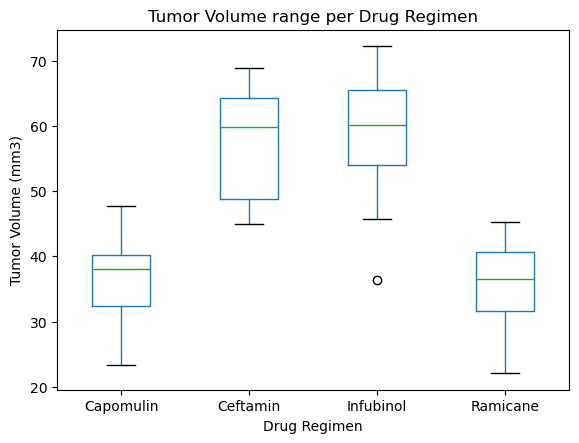

In [246]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
axes = tumor_data_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", grid = False)
plt.title("Tumor Volume range per Drug Regimen")
plt.suptitle("")
axes.set_ylabel("Tumor Volume (mm3)")

#Save and Display plot
plt.savefig("Tumor Volume range per Drug Regimen.png")
plt.show()

## Line and Scatter Plots

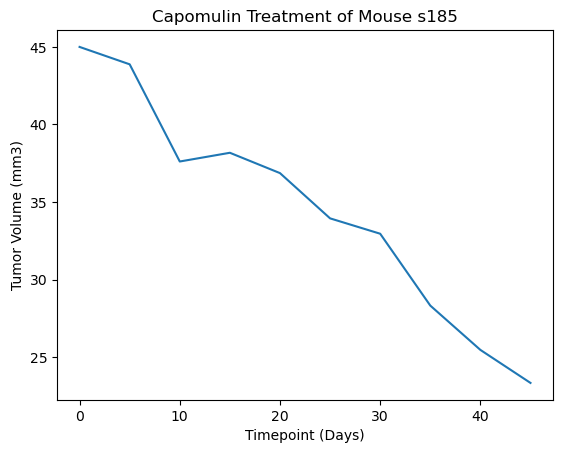

In [247]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Isolate data
capomulin = pyma_df_filt.loc[pyma_df_filt["Drug Regimen"] == "Capomulin", :]
capomulin = capomulin.reset_index(drop=True)
mouse_id = capomulin.at[0, "Mouse ID"]
data_line_plot = pyma_df_filt.loc[pyma_df_filt["Mouse ID"] == mouse_id, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#Plot the data
plt.plot(data_line_plot["Timepoint"], data_line_plot["Tumor Volume (mm3)"])
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

#Save and Display plot
plt.savefig(f"Capomulin Treatment of Mouse {mouse_id}.png")
plt.show()

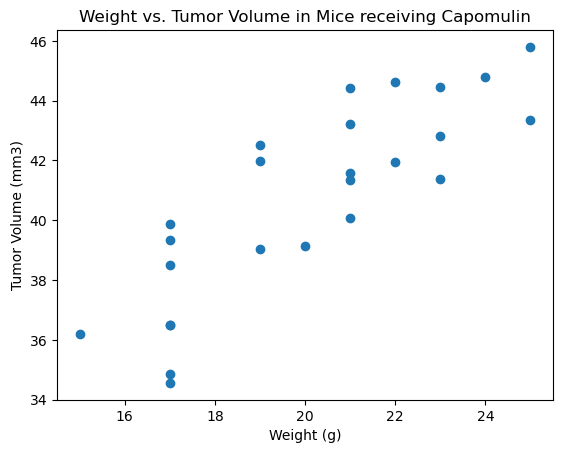

In [261]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# The instructions do not mention that this plot is to use the 'maximum timepoint' data, but the example plot does not match without this filtering.
# Even with the filtering there is some discrepency... Please make instructions clearer.

#Isolate the data
capomulin_grouped = capomulin.groupby("Mouse ID").mean()
capomulin_weight = capomulin_grouped["Weight (g)"]
capomulin_tumor_vol = capomulin_grouped["Tumor Volume (mm3)"]

# #Plot the data
plt.scatter(capomulin_weight, capomulin_tumor_vol)
plt.title("Weight vs. Tumor Volume in Mice receiving Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# #Save and display plot
plt.savefig("Weight (g) vs Tumor Volume (mm3) in Mice receiving Capomulin.png")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


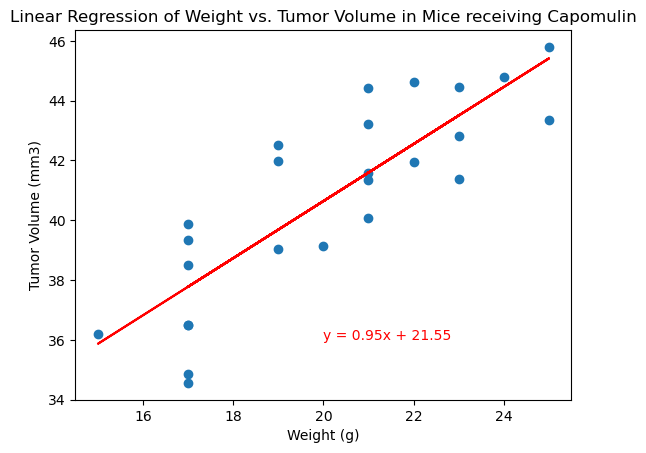

In [268]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate the correlation values
correlation = st.pearsonr(capomulin_weight, capomulin_tumor_vol)
r_stat = correlation[0]
print(f'The correlation between mouse weight and the average tumor volume is {round(r_stat, 2)}')

#Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weight, capomulin_tumor_vol)
regress_values = capomulin_weight * slope + intercept

#Save the line equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# #Plot the data
plt.scatter(capomulin_weight, capomulin_tumor_vol)
plt.title("Linear Regression of Weight vs. Tumor Volume in Mice receiving Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#Add the regression line & equation
plt.plot(capomulin_weight, regress_values, "r-")
plt.text(20, 36, f'{line_eq}', color="red")

# #Save and display plot
plt.savefig("Linear Regrssion between Weight vs Tumor Volume in Mice receiving Capomulin.png")
plt.show()
